# Module Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LambdaCallback, TensorBoard

from sklearn.preprocessing import LabelBinarizer
from tensorflow.nn import local_response_normalization

# Model

In [7]:
input_shape = (224, 224, 3)
x = Input(shape = input_shape, name = 'INPUT')
# Conv
conv1 = Conv2D(filters = 96, kernel_size = 11, activation = 'relu', strides = 4, name = 'Conv_1')(x)
maxpool1 = MaxPool2D(pool_size = (3, 3), strides = 2, name = 'Pool_1')(conv1)
#lrn1 = local_response_normalization(conv1, depth_radius = 5, bias = 2, alpha = 0.0001, beta = 0.75)
lrn1 = BatchNormalization(name = 'LRN_1')(maxpool1)

conv2 = Conv2D(filters = 256, kernel_size = 5, activation = 'relu', strides =1, padding = 'same', name = 'Conv_2')(lrn1)
maxpool2 = MaxPool2D(pool_size = (3, 3), strides = 2, name = 'Pool_2')(conv2)
#lrn2 = local_response_normalization(conv2, depth_radius = 5, bias = 2, alpha = 0.0001, beta = 0.75)
lrn2 = BatchNormalization(name = 'LRN_2')(maxpool2)

conv3 = Conv2D(filters = 384, kernel_size = 3, activation = 'relu', strides = 1, padding = 'same', name = 'Conv_3')(lrn2)
conv4 = Conv2D(filters = 384, kernel_size = 3, activation = 'relu', strides = 1, padding = 'same', name = 'Conv_4')(conv3)
conv5 = Conv2D(filters = 256, kernel_size = 3, activation = 'relu', strides = 1, padding = 'same', name = 'Conv_5')(conv4)
maxpool3 = MaxPool2D(pool_size = (3, 3), strides = 2, name = 'Pool_3')(conv5)

# Fully-connected
fc = Flatten()(maxpool3)
fc = Dense(4096, activation = 'relu', name = 'FC1')(fc)
fc = Dropout(0.5)(fc)
fc = Dense(4097, activation = 'relu', name = 'FC2')(fc)
fc = Dropout(0.5)(fc)
output = Dense(1000, activation = 'softmax', name = 'OUTPUT')(fc)

model = Model(inputs = x, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 Conv_1 (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 Pool_1 (MaxPooling2D)       (None, 26, 26, 96)        0         
                                                                 
 LRN_1 (BatchNormalization)  (None, 26, 26, 96)        384       
                                                                 
 Conv_2 (Conv2D)             (None, 26, 26, 256)       614656    
                                                                 
 Pool_2 (MaxPooling2D)       (None, 12, 12, 256)       0         
                                                                 
 LRN_2 (BatchNormalization)  (None, 12, 12, 256)       1024  

# 적용

In [24]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1], x_train.shape[2], x_train.shape[3]

In [25]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
y_train.shape

(50000, 10)

In [10]:
print(img_height, img_width)

32 32


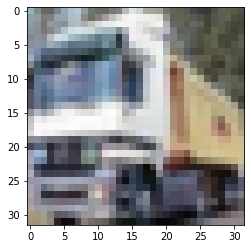

In [11]:
plt.imshow(x_train[1])

In [23]:
model = Sequential()
model.add(Conv2D(filters = 48, kernel_size = (3, 3), 
                 strides = (2, 2), activation = 'relu', 
                 padding = 'same', input_shape = (img_height, img_width, channel, )))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 96, kernel_size = (3, 3), 
                 activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(192, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(192, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [27]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(),
             metrics = ['acc'])

hist = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/10
391/391 [==============================] - 4s 8ms/step - loss: 1.5464 - acc: 0.4403 - val_loss: 1.2136 - val_acc: 0.5700
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 1.1348 - acc: 0.6077 - val_loss: 1.2279 - val_acc: 0.5667
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 0.9524 - acc: 0.6755 - val_loss: 0.9671 - val_acc: 0.6644
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 0.8249 - acc: 0.7218 - val_loss: 0.9316 - val_acc: 0.6878
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 0.7250 - acc: 0.7587 - val_loss: 1.2639 - val_acc: 0.6065
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.6389 - acc: 0.7850 - val_loss: 1.0607 - val_acc: 0.6648
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 0.5569 - acc: 0.8126 - val_loss: 0.9336 - val_acc: 0.7091
Epoch 8/10
391/391 [==============================] - 3s 7ms/step - loss: 0.

In [29]:
score = model.evaluate(x_test, y_test, verbose = 1)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])
pred = model.predict(x_test, verbose = 1)

313/313 [==============================] - 1s 2ms/step - loss: 1.0511 - acc: 0.7070
Test Loss:  1.051131010055542
Test Accuracy:  0.7070000171661377
313/313 [==============================] - 1s 1ms/step


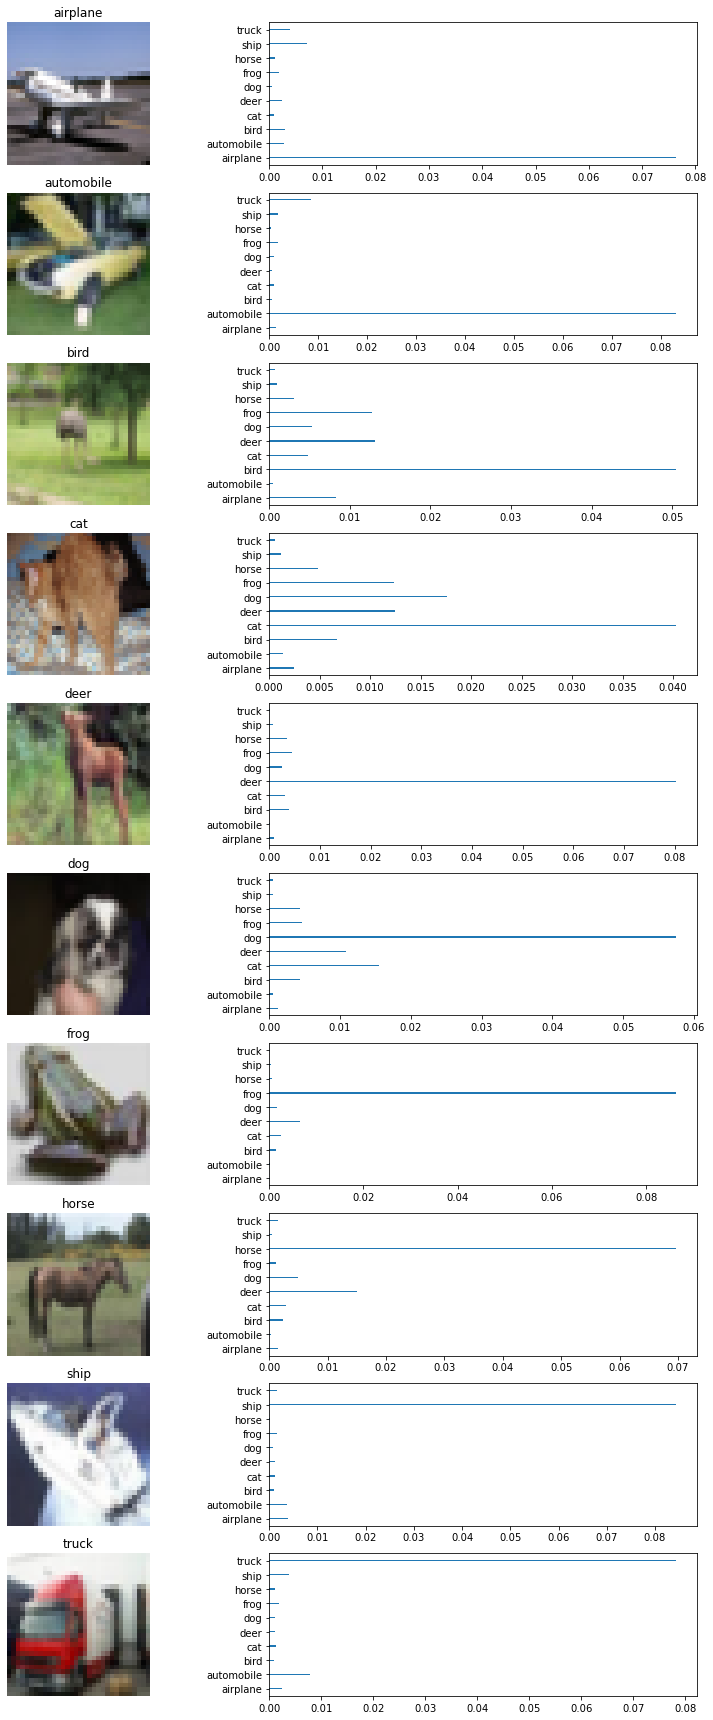

In [32]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def display_image_predictions(features, labels, predictions):
    n_classes = 10
    label_names = load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))
    
    fig, axs = plt.subplots(10, 2, figsize = (12, 24))
    margin = 0.05
    ind = np.arange(n_classes)
    width = (1. - 2. * margin) / n_classes
    arr_features = [None] * 10
    arr_predictions = np.zeros((10, 10))
    last_image_i = 0
    
    for i, prediction in enumerate(pred):
        label_id = label_ids[i]
        feature = features[i]
        arr_features[label_id] = feature
        max_id = np.argmax(prediction)
        arr_predictions[label_id][max_id] += 1
        last_image_i = i
        
    arr_predictions /= last_image_i
    
    for i in range(10):
      feature = arr_features[i]
      pred_name = label_names[i]
      prediction = arr_predictions[i]
      axs[i][0].imshow(feature)
      axs[i][0].set_title(pred_name)
      axs[i][0].set_axis_off()

      axs[i][1].barh(ind + margin, prediction, width)
      axs[i][1].set_yticks(ind + margin)
      axs[i][1].set_yticklabels(label_names)

    plt.tight_layout()

display_image_predictions(x_test, y_test, pred)

# AlexNet

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [33]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name = None)
x_test = tf.expand_dims(x_test, axis=3, name = None)
x_train = tf.repeat(x_train, 3, axis = 3)
x_test = tf.repeat(x_test, 3, axis = 3)
x_val = x_train[-2000: , :, :, :]
y_val = y_train[-2000:]
x_train = x_train[:-2000, :, :, :]
y_train = y_train[:-2000]

In [34]:
model = models.Sequential()

# Conv
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))

model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))

model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

# FC
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
## 1000 classes in paper // dataset : ILSVRC-2010
model.add(layers.Dense(10, activation='softmax'))                                                                               
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 lambda_6 (Lambda)           (None, 56, 56, 96)        0         
                                                                 
 activation_15 (Activation)  (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 256)         614656    
                                                      

In [35]:
model.compile(optimizer=  'adam', 
             loss = losses.sparse_categorical_crossentropy,
             metrics = ['acc'])

In [36]:
hist = model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
907/907 [==============================] - 62s 68ms/step - loss: 0.4888 - acc: 0.8251 - val_loss: 0.0670 - val_acc: 0.9820
Epoch 2/10
907/907 [==============================] - 62s 68ms/step - loss: 0.1043 - acc: 0.9720 - val_loss: 0.0493 - val_acc: 0.9865
Epoch 3/10
907/907 [==============================] - 60s 66ms/step - loss: 0.0814 - acc: 0.9789 - val_loss: 0.0478 - val_acc: 0.9895
Epoch 4/10
907/907 [==============================] - 60s 66ms/step - loss: 0.0649 - acc: 0.9828 - val_loss: 0.0684 - val_acc: 0.9845
Epoch 5/10
907/907 [==============================] - 60s 66ms/step - loss: 0.0552 - acc: 0.9865 - val_loss: 0.0508 - val_acc: 0.9875
Epoch 6/10
907/907 [==============================] - 60s 66ms/step - loss: 0.0478 - acc: 0.9871 - val_loss: 0.0361 - val_acc: 0.9910
Epoch 7/10
907/907 [==============================] - 60s 66ms/step - loss: 0.0421 - acc: 0.9892 - val_loss: 0.0337 - val_acc: 0.9930
Epoch 8/10
907/907 [==============================] - 60s 66ms

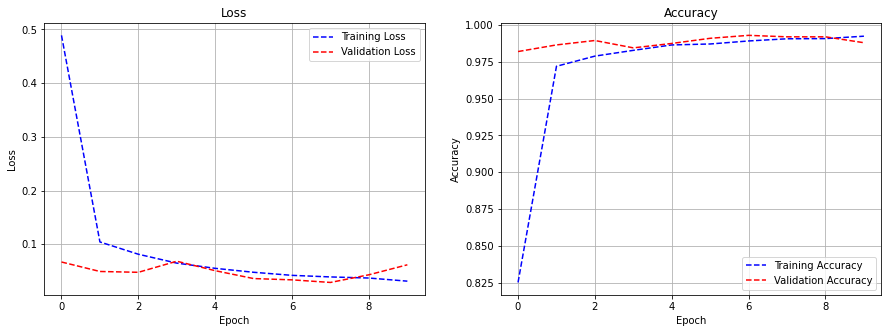

In [43]:
epochs = range(10)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, hist.history['loss'], 'b--', label = 'Training Loss')
plt.plot(epochs, hist.history['val_loss'], 'r--', label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc = 'best')

plt.subplot(1, 2, 2)
plt.plot(epochs, hist.history['acc'], 'b--', label = 'Training Accuracy')
plt.plot(epochs, hist.history['val_acc'], 'r--', label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc = 'best')

plt.show()